<a href="https://colab.research.google.com/github/EvandroOCosta/scripts/blob/main/SEGURO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1° - Problema de Negócio

Precisamos prever o custo do seguro de vida, dadas certas características da pessoa.

###2° Análise Exploratória

Esta etapa ajuda a descobrir os problemas que desejaremos abordar na próxima etapa e levar em consideração ao construir e avaliar nosso modelo. Também queremos encontrar relacionamentos ou padrões interessantes que possamos potencializar na solução do problema que especificamos.

In [29]:
# IMPORTANDO AS BIBLIOTECAS PYTHON NECESSÁRIAS
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
# LER A BASE DE DADOS
df = pd.read_csv('/content/insurance.csv')
display(df)

In [ ]:
#ALGUMAS INFORMAÇÕES DA BASE DE DADOS
df.info()

In [6]:
# QUAIS OS TIPOS DE DADOS?
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Temos 3 campos com dados do tipo categóricos (texto): bmi, smoker e region. Esses dados precisam ser convertidos para números inteiros para melhores resultados.

In [7]:
#SERÁ QUE TEMOS DADOS NULOS?
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

NÃO temos dados nulos!! Podemos processeguir.

In [8]:
# E duplicados, nós temos?
df.duplicated().sum()

1

SIM... Vamos tratar esse problema em outra etapa.

In [9]:
# Estes são os registros duplicados
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


# **IMPORTANTE!!!**

Registros duplicados podem distorcer análises de dados, levando a conclusões enviesadas e erros de contagem. Eles também podem inflacionar resultados e prejudicar a eficiência computacional, dificultando a detecção de tendências reais nos dados. Portanto, é crucial identificar e remover duplicatas durante a preparação dos dados para garantir análises precisas.

Na etapa 3 - Pré-processamento de dados iremos tratar a questão de registros duplicados. Agora, vamos seguir com a análise exploratória.

In [13]:
# Quantos registros da amostra são referentes a homens e quantos a mulheres?
print('Homens:', df.sex.value_counts()['male'], '=',
      '{:.2f}%'.format(df['sex'].value_counts(normalize=True)['male'] * 100))
print('Mulheres:', df.sex.value_counts()['female'], '=',
      '{:.2f}%'.format(df['sex'].value_counts(normalize=True)['female'] * 100))


Homens: 676 = 50.52%
Mulheres: 662 = 49.48%


ÓTIMO! A amostra está bem balanceada.

<Axes: xlabel='count', ylabel='sex'>

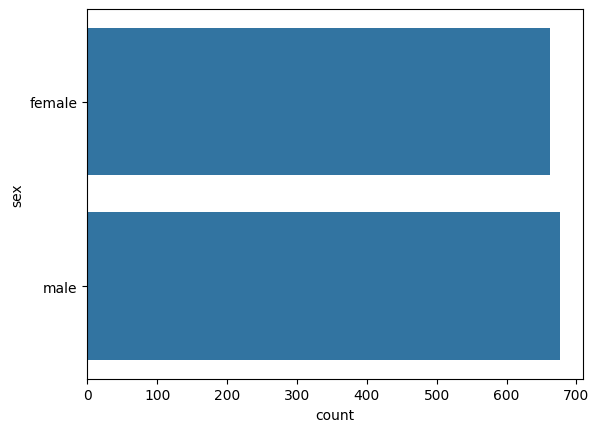

In [14]:
sns.countplot(df.sex)

<Axes: xlabel='count', ylabel='smoker'>

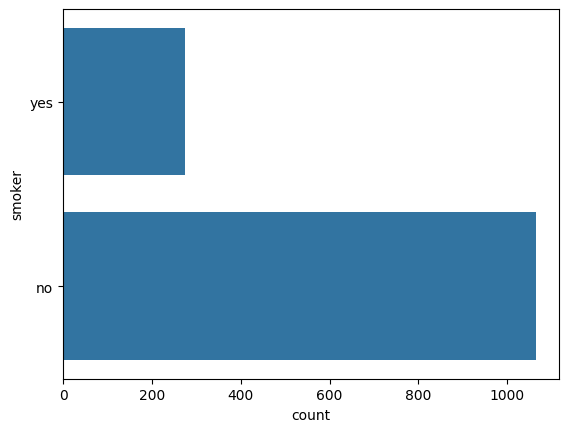

In [15]:
# Quantos fumantes e não fumantes?
df.smoker.value_counts()
sns.countplot(df.smoker)

In [19]:
print('Fumantes:', df.smoker.value_counts()['yes'], '=',
      '{:.2f}%'.format(df['smoker'].value_counts(normalize=True)['yes'] * 100))
print('Não fumantes:', df.smoker.value_counts()['no'], '=',
      '{:.2f}%'.format(df['smoker'].value_counts(normalize=True)['no'] * 100))

Fumantes: 274 = 20.48%
Não fumantes: 1064 = 79.52%


Boa notícia: somente 20% são fumantes. Parece que as campanhas anti-tabagismo tem surtido efeito...

###3° Pré-processamento dos Dados

Etapa importante para a limpeza da base de dados. No nosso caso, temos poucos problemas a resolver. Lembra que encontramos um registro duplicado? É nessa etapa que iremos solucionar essa questão.

In [21]:
#Estes são os registros duplicados:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [23]:
# Vamos excluir um dos regostros. Por convenção, vamos manter o primeiro registro (índice 195)
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

Não temos mais registros duplicados

Outro problema que vamos resolver agora são os registros categóricos (texto). Nessa base de dados temos 3 campos desse tipo.

In [26]:
# Transformando categóricos em numéricos
le = LabelEncoder()
le.fit(df['sex'].drop_duplicates())
le.fit(df['smoker'].drop_duplicates())
le.classes_ = np.append(le.classes_, ['female'])
le.classes_ = np.append(le.classes_, ['male'])
df.sex = le.transform(df['sex'])
df.smoker = le.transform(df['smoker'])
print(df['sex'].unique())
print(df['smoker'].unique())

[2 3]
[1 0]


In [27]:
# Qual a correlação entre o valor do seguro e as demais variáveis?
df.corr()['charges']

<ipython-input-27-2d9c12a1a7f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['charges']


age         0.298308
sex         0.058044
bmi         0.198401
children    0.067389
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

<ipython-input-30-bdcdd4b9f951>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdBu')


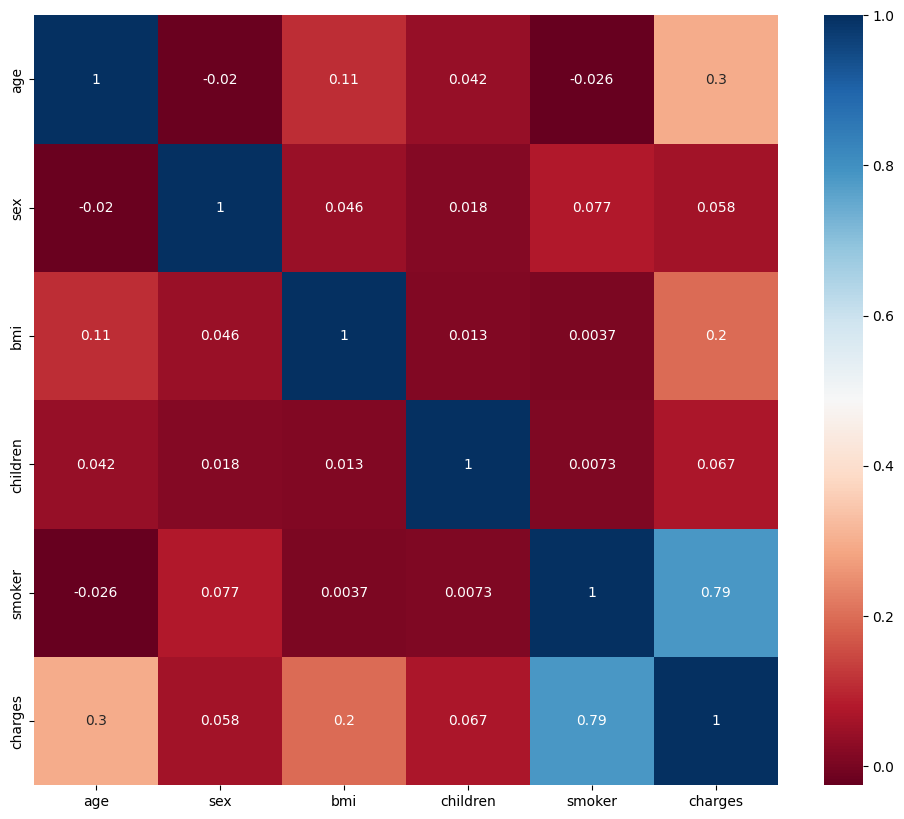

In [30]:
#VISUALIZAÇÃO GRÁFICA
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

In [32]:
# Um resumo dos nossos dados
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,2.504862,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,2.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,2.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,3.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,3.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,3.000000,53.130000,5.000000,1.000000,63770.428010


###4° Construção da Máquina Preditiva

#### Modelo Baseline - Usaremos somente a Variável de maior correlação com o Target

In [33]:
# Separando a base de dados em 80% para treinamento e 20% para teste
X = df['smoker'].values.reshape(-1, 1)
y = df['charges'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [34]:
# Construção e treino do modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Aplicando a validação do modelo
y_predict = model.predict(X_test)

In [37]:
# Criar um datatframe de comparação do valor real e do valor predito
real_vs_predito = pd.DataFrame({'real': y_test.flatten(),
                                 'predito': y_predict.flatten()})
real_vs_predito.sample(12)

,real,predito
38,44501.39820,31622.980783
255,5846.91760,8425.958419
248,27117.99378,8425.958419
80,4766.02200,8425.958419
200,1875.34400,8425.958419
189,4320.41085,8425.958419
87,7421.19455,8425.958419
253,1964.78000,8425.958419
254,5415.66120,8425.958419
203,6600.20595,8425.958419


In [38]:
# Avaliando o modelo
print('Acurácia: %.2f'% (model.score(X_test, y_test)*100), '%' )

Acurácia: 61.73 %


Tevemos 61,73% de acurácia. Podemos melhorar isso...

#### Modelo mais Robusto:

Que tal usar não uma, mas muitas das características para prever custos.

In [39]:
# Elimina somente o target do 'x'
X = df.drop(['charges','region'], axis=1)
# Deixa somente o target no 'y'
y = df['charges'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Nova avaliação
print('Acurácia: %.2f'% (model.score(X_test, y_test)*100), '%' )

Acurácia: 74.40 %


Agora, sim... A acurácia subiu para 74,4%.